In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yfin

In [3]:
Tesla = yfin.Ticker('TSLA')

In [4]:
Tesla_data = Tesla.history(period="max")

In [5]:
df_tesla = Tesla_data

In [6]:
df_tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Simple Moving Average

In [7]:
df_tesla[['Open','Open : 10 days rolling']].loc['2020-01-01':'2021-01-01'].plot(figsize=(15,6))


KeyError: "['Open : 10 days rolling'] not in index"

In [13]:
df_tesla['Open : 10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

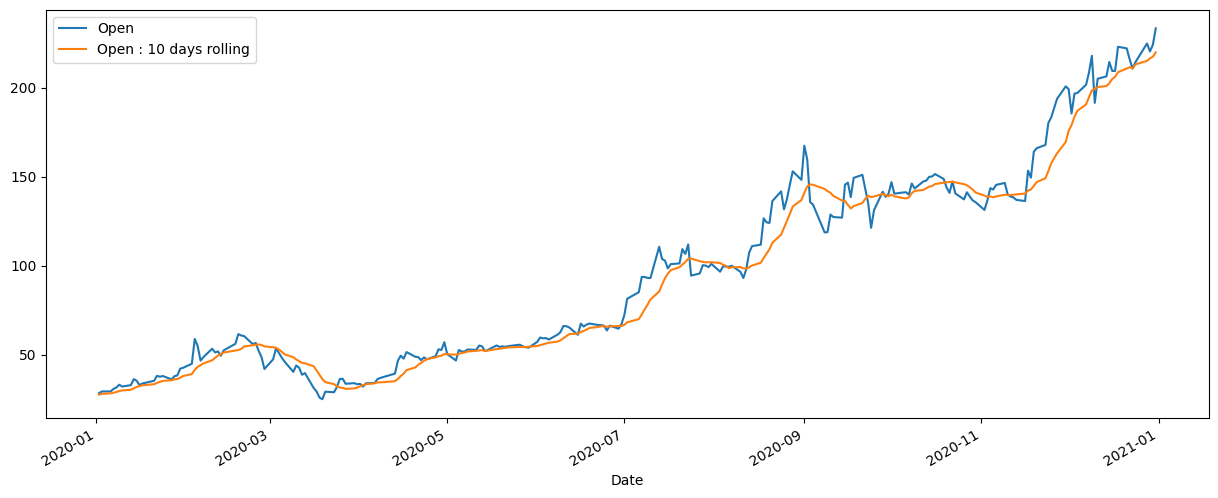

In [ ]:
df_tesla[['Open','Open : 10 days rolling']].loc['2020-01-01':'2021-01-01'].plot(figsize=(15,6))


In [8]:
df_tesla['Open : 30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()

In [9]:
df_tesla['Open : 50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

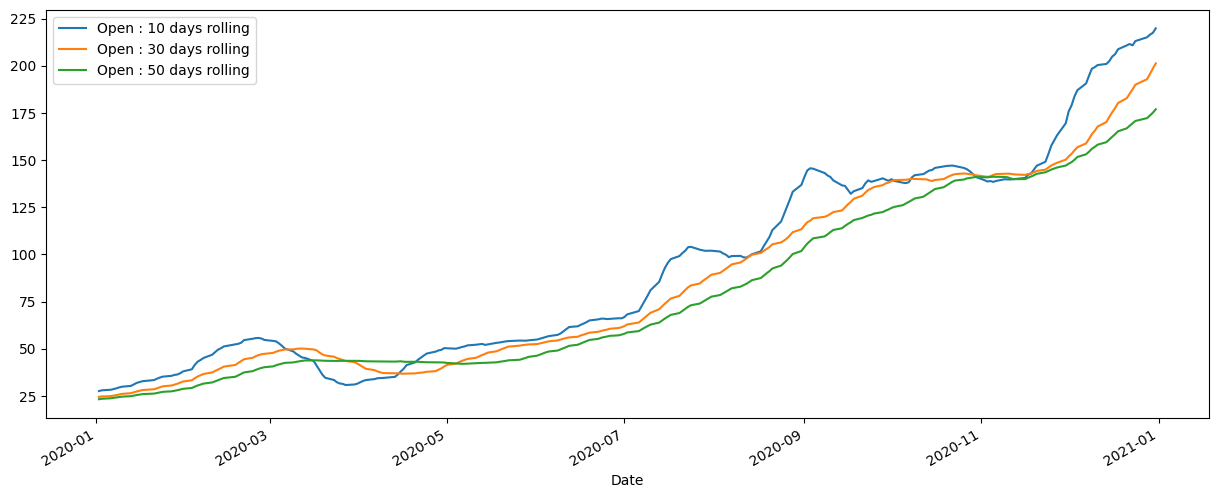

In [16]:
df_tesla[['Open : 10 days rolling','Open : 30 days rolling','Open : 50 days rolling']].loc['2020-01-01':'2021-01-01'].plot(figsize=(15,6))

In [17]:
df_tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open : 30 days rolling,Open : 50 days rolling,Open : 10 days rolling
Date,,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,1.266667,1.266667,1.266667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,1.493000,1.493000,1.493000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,1.550889,1.550889,1.550889
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.546500,1.546500,1.546500
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.503867,1.503867,1.503867


Cummilative Moving Average
Expanding

<Axes: xlabel='Date'>

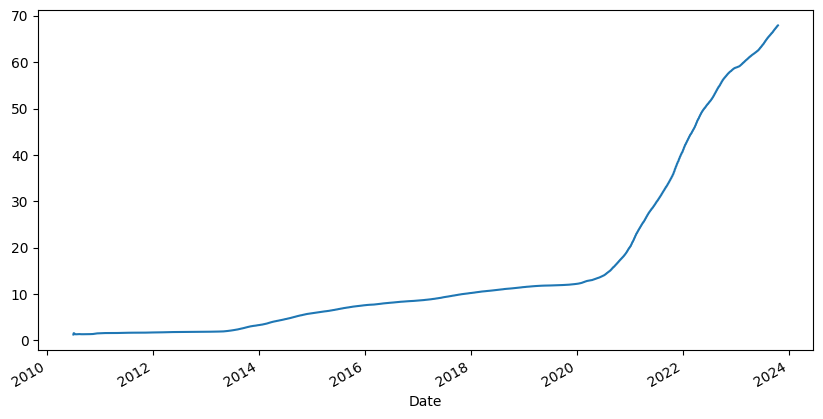

In [18]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

EMA->Exponential Moving Average

In [20]:
# Let's smoothing factor - 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

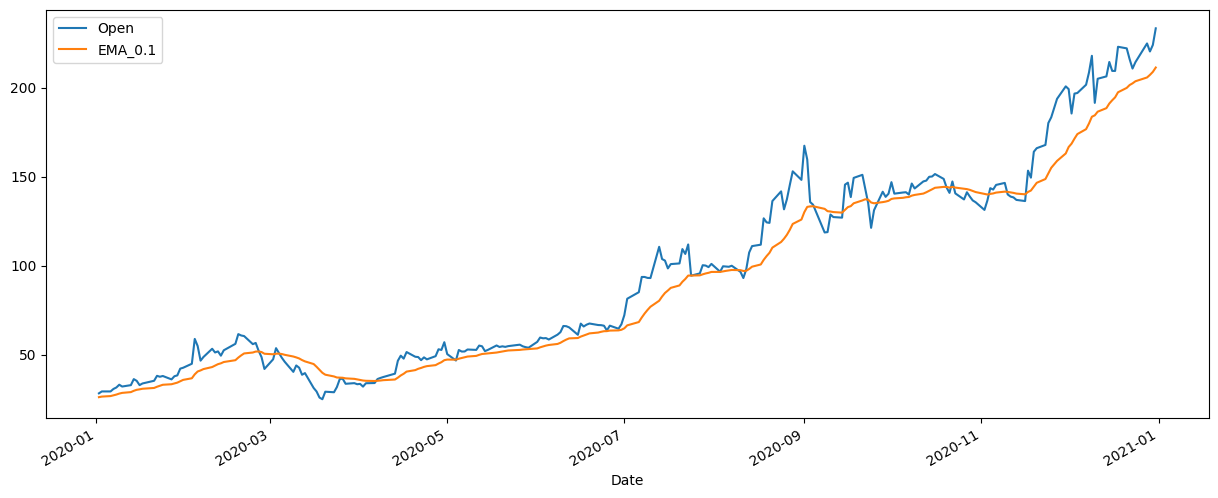

In [21]:
df_tesla[['Open','EMA_0.1']].loc['2020-01-01':'2021-01-01'].plot(figsize=(15,6))

In [22]:
# Let's smoothing factor - 0.1
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

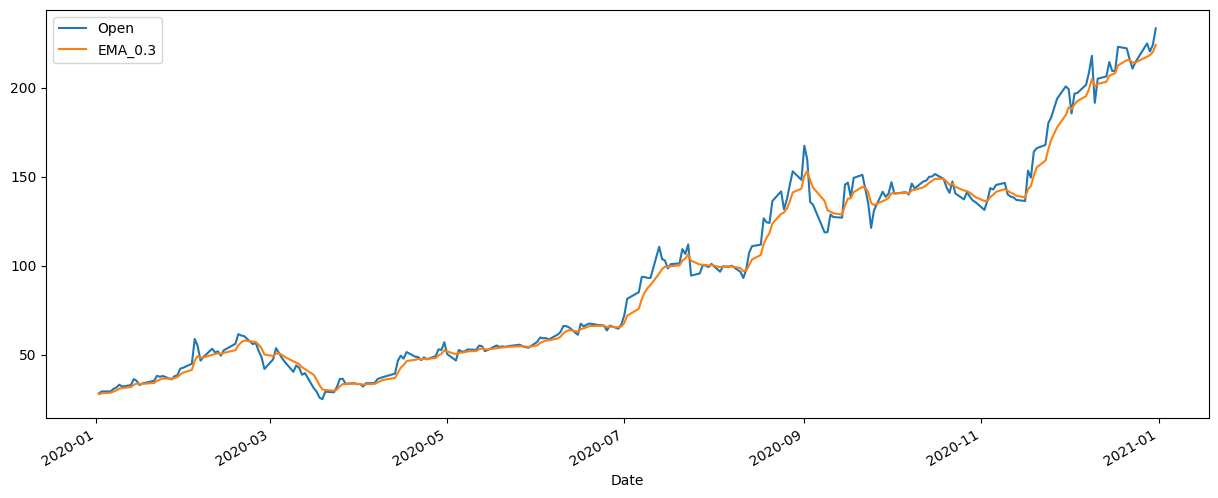

In [23]:
df_tesla[['Open','EMA_0.3']].loc['2020-01-01':'2021-01-01'].plot(figsize=(15,6))

<Axes: xlabel='Date'>

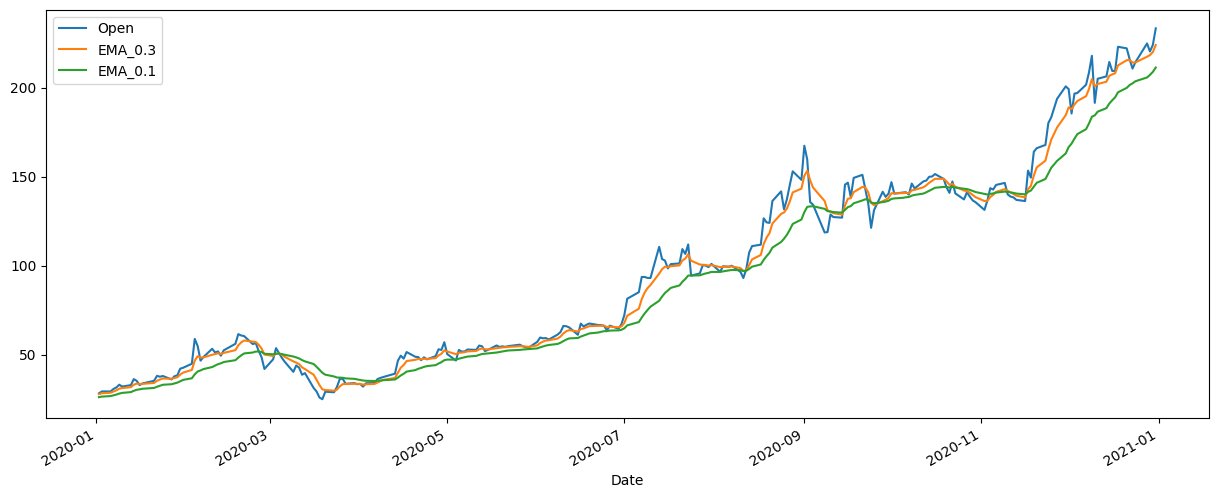

In [24]:
df_tesla[['Open','EMA_0.3','EMA_0.1']].loc['2020-01-01':'2021-01-01'].plot(figsize=(15,6))

In [25]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

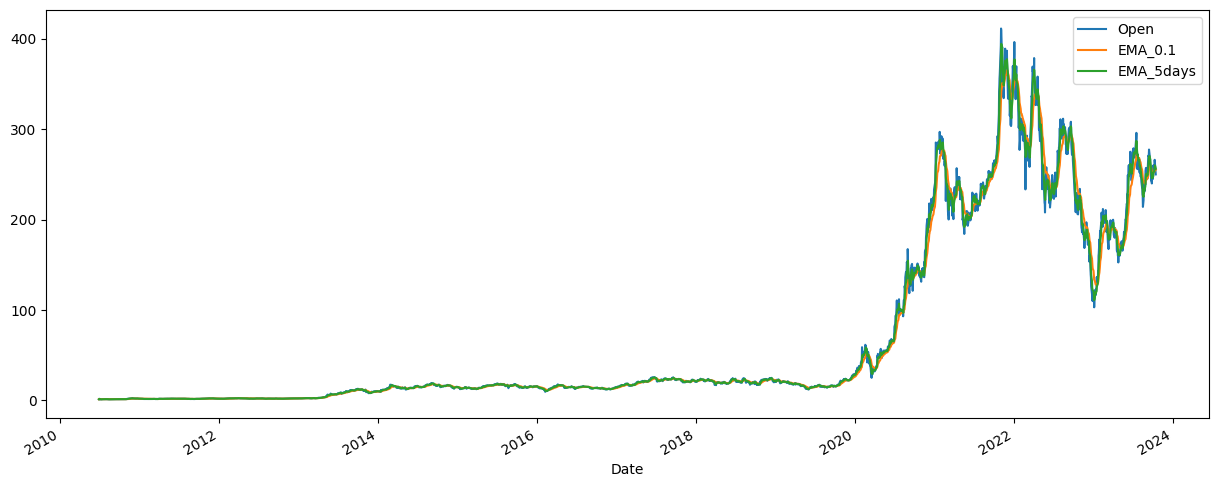

In [26]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize=(15,6))

AttributeError: module 'pandas' has no attribute 'ewma'